He


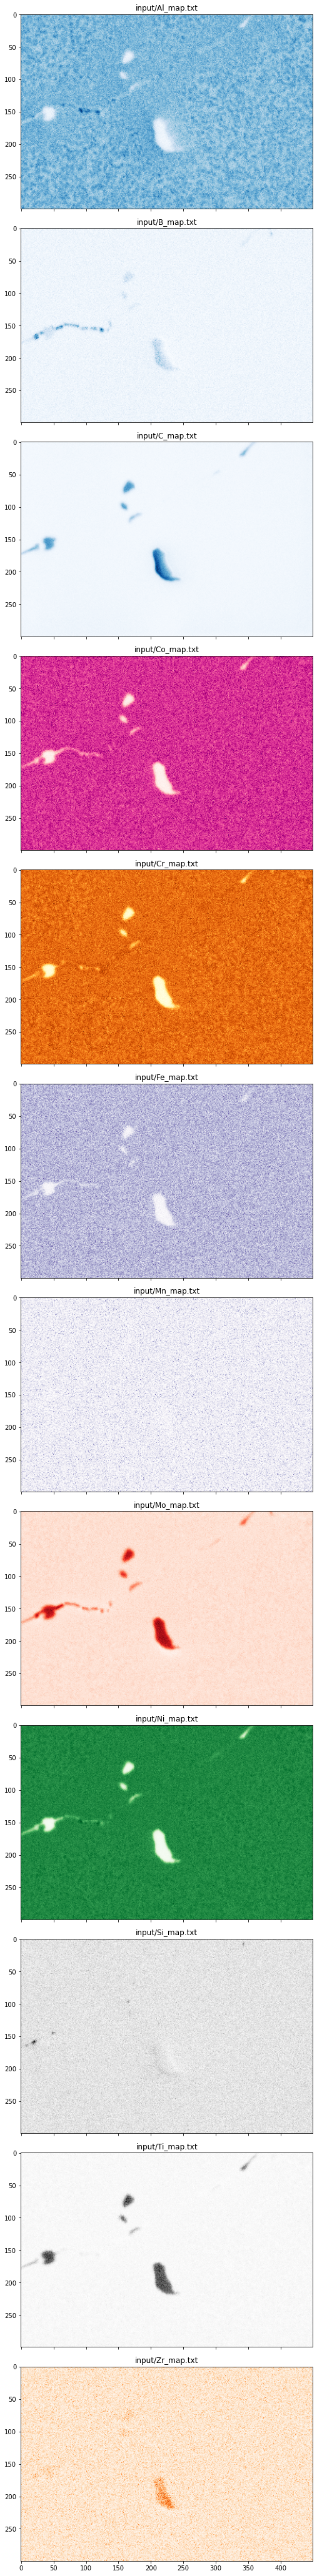

In [18]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 05 17:16:03 2022
@author: felixtheska
"""

import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy import ndimage


# Getting map text files in folder of choice
Maps = glob.glob('input/*.txt')
CMaps = np.loadtxt('elements_colormap.csv',delimiter=",",dtype=str,skiprows=2)
#print(CMaps[1,2])
ColorMaps = ['Blues', 'Blues', 'Blues', 'RdPu', 'YlOrBr', 'Purples', 'Purples', 'Reds', 'Greens', 'Greys', 'Greys', 'Oranges']

# Reading the data from files
def Read_Data(File_Name):
    Data = np.loadtxt(File_Name)
    return Data


# Generating the maps
def Map_Series(Series, Scale):
    fig = plt.figure(figsize=(10,75))
    gs = fig.add_gridspec(int(len(Series)))
    axs = gs.subplots(sharex=True, sharey=True)
    fig.subplots_adjust(hspace = 0.1)
    for itr, File in enumerate(Series):
        Map = Read_Data(File)
        Map_rotate = ndimage.rotate(Map, -90)
        Scale = ColorMaps[itr]
        axs[itr].imshow(Map_rotate, cmap=Scale) 
        axs[itr].title.set_text(Series[itr])
        figure = plt.figure()
        plt.imshow(Map_rotate, cmap=Scale)
        figure.savefig('export' + Series[itr].lstrip('input') + '.svg')
        plt.close(figure)
        
        
# Generating and exporting element maps 
Map_Series(Maps, Scale='Greys')